# Plot a confusion matrix

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

Data is captured after a training run and imported from a CSV. This prevents loss of model training data when the runtime terminates or the kernel crashes. Neither TensorFlow or Keras appear to provide access to model history from a loaded model.

In [6]:
# Import CSV of all predictions from a training run
df = pd.read_csv('./data/2024-09-19-all_predictions.csv')

# Filter data by top predictions
top_predictions = df.iloc[::12, :].reset_index(drop=True)

# Display DataFrame
top_predictions

,True labels,Predicted labels,Probabilities
0,Transfer To Bed,Transfer To Bed,1.00
1,Transfer To Bed,Transfer To Bed,1.00
2,Transfer To Bed,Transfer To Bed,0.99
3,Transfer To Bed,Transfer To Bed,1.00
4,Doctor Visit,Doctor Visit,0.99
...,...,...,...
890,Talking on the Phone,Talking on the Phone,1.00
891,Talking on the Phone,Talking on the Phone,1.00
892,Talking on the Phone,Talking on the Phone,1.00
893,Talking on the Phone,Talking on the Phone,1.00


In [7]:
# Select true and predicted labels
true_classes = top_predictions['True labels']
predicted_classes = top_predictions['Predicted labels']

In [11]:
# Make classification report
report = classification_report(true_classes, predicted_classes)
print(report)

                        precision    recall  f1-score   support

Asleep Trying to sleep       0.98      0.76      0.86       316
          Doctor Visit       1.00      1.00      1.00         2
             EVS Visit       0.24      1.00      0.39        10
                Eating       0.93      0.96      0.95        72
                Family       0.86      1.00      0.93        19
          Lying In Bed       0.69      1.00      0.82        66
           Nurse Visit       0.83      0.66      0.73        96
 Sitting In Wheelchair       0.58      1.00      0.73        56
  Talking on the Phone       0.71      0.97      0.82        36
               Therapy       0.28      1.00      0.43         5
       Transfer To Bed       0.80      1.00      0.89         4
           Watching TV       0.95      0.77      0.85       213

              accuracy                           0.82       895
             macro avg       0.74      0.93      0.78       895
          weighted avg       0.88     

In [155]:
# Function to plot confusion matrix. This prevents the notebook from printing the plot twice.
def plot_confusion(t_class, p_class, color_map, title, title_size, label_size, tick_size):
    fig, ax = plt.subplots(figsize=(7,7))

    plt.title(title, fontsize = title_size)
    plt.xticks(fontsize = tick_size)
    plt.yticks(fontsize = tick_size)
    plt.ylabel("True label", fontsize = label_size)
    plt.xlabel("Predicted label", fontsize = label_size)

    cm = ConfusionMatrixDisplay.from_predictions(t_class, 
                                                 p_class, 
                                                 cmap=color_map)

    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position()
                        .y0,0.02,ax.get_position().height])

    cm.plot(ax=ax, colorbar=False, 
            xticks_rotation='vertical', 
            cmap=color_map)
    
    plt.colorbar(cm.im_, cax=cax)
   
    plt.close()
    
    return fig

/var/folders/_9/4g32l3792w94_gk4_16tnt7c0000gn/T/ipykernel_2590/1032847325.py:22: UserWarning: Adding colorbar to a different Figure <Figure size 700x700 with 2 Axes> than <Figure size 640x480 with 2 Axes> which fig.colorbar is called on.
  plt.colorbar(cm.im_, cax=cax)


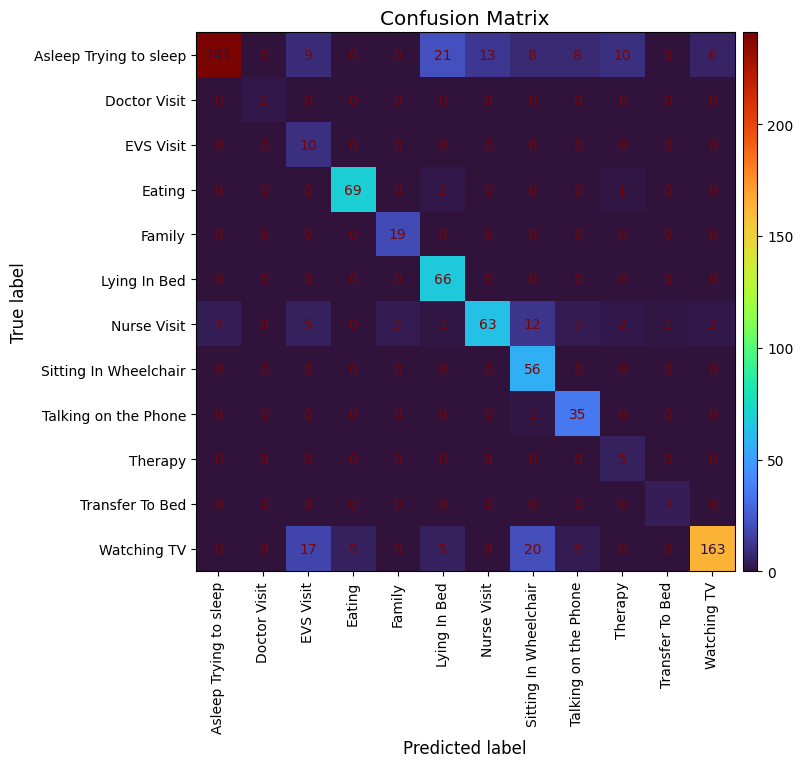

In [158]:
# Define plot design
colors = 'turbo'
title = 'Confusion Matrix'
title_size = 'x-large'
tick_size = 'medium'
label_size = 'large'

# Make the plot
confusion_matrix = plot_confusion(true_classes, 
                                  predicted_classes, 
                                  color_map = colors,
                                  title = title,
                                  title_size = title_size,
                                  tick_size = tick_size,
                                  label_size = label_size)

## References
- [Resize confustion matrix](https://stackoverflow.com/questions/66483409/adjust-size-of-confusionmatrixdisplay-scikitlearn)
- [MPL colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
- [Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)